In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
for lat_long in coordinates:
    print(lat_long[0], lat_long[1])

-0.5464460387268701 94.89400941914306
49.71565491818049 62.436783147967304
-14.167229673615438 79.70372355193126
-13.477388233920976 -106.99712178203154
-53.12156923120605 -61.90989884975876
0.6132858696239651 45.03088611307379
-83.98111078969663 -144.13501397897113
32.26440749827226 139.75508307736874
4.905243499295366 -149.21468253019876
43.58190096759114 -167.54218644472454
13.499672516579537 11.0109285674217
42.14644594409438 12.8737208396511
-80.32660368767716 -103.57436240528266
66.34191534697806 81.76929474375368
-48.86974812899416 45.23099934366803
-31.332020345646853 91.0922249977778
-14.588053734590162 -130.67678911978436
59.25335016429557 -24.228748679239487
-17.444402782684335 36.8024694560888
55.89820022416805 -176.90509381833616
-82.76753591521245 113.3114569230126
53.016857923129265 83.7873826347834
-9.99134276885259 -62.98129105708608
22.06289504442222 -61.352830651578614
-58.64804536739618 -133.6852528911709
-51.732142803989554 63.02677636108109
-76.21065506640461 98.0

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

sibolga id
svetlyy ru
hithadhoo mv
puerto ayora ec
ushuaia ar
barawe so
mataura pf
shimoda jp
hilo us
bethel us
gashua ng
palombara sabina it
punta arenas cl
krasnoselkup ru
umzimvubu za
carnarvon au
rikitea pf
grindavik is
quelimane mz
provideniya ru
albany au
yuzhnyy ru
ariquemes br
the valley ai
rikitea pf
taolanaro mg
albany au
hobart au
laguna br
tsihombe mg
punta arenas cl
petropavlovsk-kamchatskiy ru
kaitangata nz
luderitz na
san cristobal ec
ushuaia ar
rikitea pf
punta arenas cl
busselton au
severo-kurilsk ru
kapaa us
saleaula ws
walvis bay na
lebu cl
mentok id
impfondo cg
mingaora pk
puerto madryn ar
upernavik gl
port macquarie au
bambous virieux mu
kainantu pg
cavalcante br
west wendover us
esqueda mx
madimba tz
georgetown sh
hilo us
arraial do cabo br
codrington ag
eyrarbakki is
punta arenas cl
hermanus za
ribeira grande pt
bredasdorp za
bubaque gw
quthing ls
bredasdorp za
mahebourg mu
monteagudo bo
parry sound ca
cape town za
cape town za
alice springs au
jamestown sh
busse

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)


630

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

for i in range (len(cities)):
     # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        #time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    city_url


Beginning Data Retrieval     
-----------------------------


In [9]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        #time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 31 of Set 25 | sibolga
Processing Record 32 of Set 25 | svetlyy
Processing Record 33 of Set 25 | hithadhoo
Processing Record 34 of Set 25 | puerto ayora
Processing Record 35 of Set 25 | ushuaia
Processing Record 36 of Set 25 | barawe
City not found. Skipping...
Processing Record 37 of Set 25 | mataura
Processing Record 38 of Set 25 | shimoda
Processing Record 39 of Set 25 | hilo
Processing Record 40 of Set 25 | bethel
Processing Record 41 of Set 25 | gashua
Processing Record 42 of Set 25 | palombara sabina
Processing Record 43 of Set 25 | punta arenas
Processing Record 44 of Set 25 | krasnoselkup
Processing Record 45 of Set 25 | umzimvubu
City not found. Skipping...
Processing Record 46 of Set 25 | carnarvon
Processing Record 47 of Set 25 | rikitea
Processing Record 48 of Set 25 | grindavik
Processing Record 49 of Set 25 | quelimane
Processing Record 50 of Set 25 | provideniya
Processing Record 51 of Set 25 | albany
Processing Record 52 of Set 25 | yuzhnyy
Processing 

In [10]:
city_data_df = pd.DataFrame(city_data)
city_data_df 


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Sibolga,1.7427,98.7792,75.94,88,97,3.06,ID,2022-03-13 22:33:01
1,Svetlyy,54.6750,20.1347,33.96,78,2,7.87,RU,2022-03-13 22:33:01
2,Hithadhoo,-0.6000,73.0833,82.98,70,97,6.64,MV,2022-03-13 22:33:02
3,Puerto Ayora,-0.7393,-90.3518,85.96,88,43,3.00,EC,2022-03-13 22:33:02
4,Ushuaia,-54.8000,-68.3000,40.66,87,75,24.16,AR,2022-03-13 22:33:03
...,...,...,...,...,...,...,...,...,...
573,Saint-Louis,16.3333,-15.0000,83.84,8,1,12.39,SN,2022-03-13 22:36:18
574,Richards Bay,-28.7830,32.0377,76.14,82,0,13.13,ZA,2022-03-13 22:36:19
575,Kashi,39.4547,75.9797,56.41,26,40,6.71,CN,2022-03-13 22:36:19
576,Rawson,-43.3002,-65.1023,63.59,51,47,13.82,AR,2022-03-13 22:36:19


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

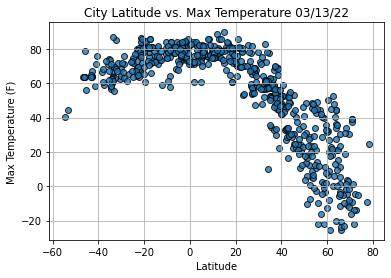

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

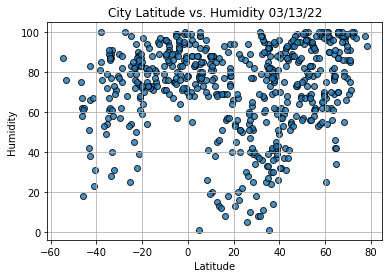

In [16]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

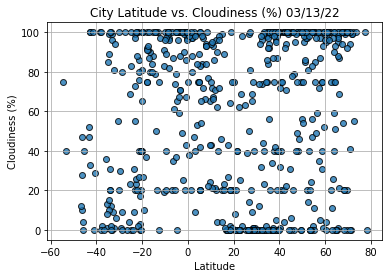

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

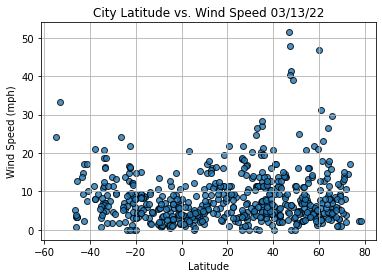

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()